In [9]:
import numpy as np
import matplotlib.pyplot as plt

### 1 Etude du problème d'optimisation
1) Dans notre cas la fonction à minimiser est :
$$
f(z) = \sum_{i=0}^{N-1}\left\|p_{i+1}-R_{i} \Delta p_{i, i+1}-p_{i}\right\|_{2}^{2}+\gamma \sum_{(i, j) \in L}\left\|p_{j}-R_{i} \Delta p_{i, j}-p_{i}\right\|_{2}^{2}
$$

avec $z =  \left(p_{1}, \ldots, p_{N}\right) = \left(x_{1}, y_{1},  \theta_{1}, \ldots,x_{N}, y_{N}, \theta_{N}\right)$, ce qui fait $3N$ variables. 

Les contraintes portent elles  sur les angles : 
$$
\forall i,\quad  \theta_{i} - \pi \leq 0, \quad - \theta_{i} - \pi \leq 0
$$

2) On remarque que $c(z)$ est convexe car les contraintes sont toutes affines.

### 2 Résolution numérique 

In [7]:
#Q3
with open ("INTEL.txt","r") as reader:
    lines = reader.readlines()
    ODO=[]
    LOOP=[]
    for line in lines:
        if line.split()[0] == 'EDGE_ODO':
            ODO.append(line.split()[3:])
        else:
            LOOP.append(line.split()[3:])


In [8]:
A=np.array(ODO,dtype=float)

In [5]:
p0=np.array([0., 0. ,0. ])
P=[p0]
for i in range(len(ODO)):
    t=P[i][2]
    Ri=np.array([[np.cos(t),-np.sin(t),0],[np.sin(t),np.cos(t),0],[0,0,1]])
    p1=np.dot(Ri,A[i])
    pi=p1+P[i]
    last_p=np.array([pi[0],pi[1],np.remainder(pi[2]+np.pi,2*np.pi)-np.pi])
    P.append(last_p)


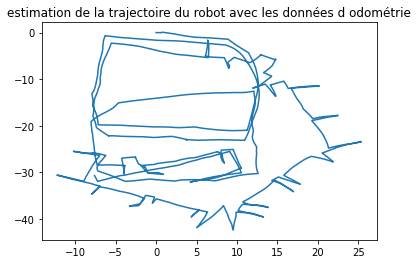

In [6]:
X = [P[i][0] for i in range(len(P))]
Y = [P[i][1] for i in range(len(P))]
plt.title('estimation de la trajectoire du robot avec les données d odométrie')
plt.plot(X,Y);

On remarque que la trajectoire du robot n'est absolument pas optimisée, il repasse plusieurs fois par le même chemin